# Performance Evaluation and Error Checking
#### Rick Gosalvez, 2021 Data Mining

## Theory

### 1. Confusion Matrix

1a. Sensitivity and 1b. Specificity

![Sensitivity and Specificity Calculations](img/HW2_Q1ab.jpg)

1c. To increase sensitivity; <b>decrease</b> cutoff.

1d. To increase specificity; <b>increase</b> cutoff.

1e. P = 3/4 "True" randomly

![Confusion Matrix that classifies items as "True" randomly with 3/4 probability](img/HW2_Q1e.jpg)

### 2. Error Calculations (used in Err Column)

#### Error formulas

$$ME\:(Mean\:Error) = \frac{1}{N}\sum\limits_{i=1}^N e_{i}$$

$$MAE\:(Mean\:Absolute\:Error) = \frac{1}{N}\sum\limits_{i=1}^N |e_{i}|$$

$$MPE\:(Mean\:Percentage\:Error) = \frac{1}{N}\sum\limits_{i=1}^N \frac{e_{i}}{y_i}$$

$$MAPE\:(Mean\:Absolute\:Percentage\:Error) = \frac{1}{N}\sum\limits_{i=1}^N |\frac{e_{i}}{y_i}|$$

$$RMSE\:(Root\:Mean\:Squared\:Error) = \sqrt{\frac{1}{N}\sum\limits_{i=1}^N e_{i}^2}\qquad general$$

$$RMSE\:(Root\:Mean\:Squared\:Error) = \frac{1}{N}\sqrt{\sum\limits_{i=1}^N e_{i}^2}\qquad not\:general$$

#### 2a. Original Dataset

Create dataset and calculate err (e) and err / act (y)

In [1]:
import pandas as pd

data_2a = {'Pred': [-0.5,  0.48, 3.1,  4.8,  5.5,  9.2], 
          'Act':   [-0.45, 0.42, 3.25, 4.48, 5.22, 9.15]}

df_2a = pd.DataFrame(data_2a)

df_2a['err']          = df_2a.Act - df_2a.Pred
df_2a['abs_err']      = abs(df_2a.Act - df_2a.Pred)
df_2a['err_div_act']  = df_2a.err / df_2a.Act
df_2a

,Pred,Act,err,abs_err,err_div_act
0,-0.50,-0.45,0.05,0.05,-0.111111
1,0.48,0.42,-0.06,0.06,-0.142857
2,3.10,3.25,0.15,0.15,0.046154
3,4.80,4.48,-0.32,0.32,-0.071429
4,5.50,5.22,-0.28,0.28,-0.053640
5,9.20,9.15,-0.05,0.05,-0.005464


In [2]:
ME      = sum(df_2a.err)/len(df_2a)
MAE     = sum(df_2a.abs_err)/len(df_2a)
MPE     = (sum(df_2a.err_div_act)/len(df_2a))*100 
MAPE    = (sum(abs(df_2a.err_div_act)/len(df_2a)))*100
RMSE_G  = (sum(df_2a.err**2)/len(df_2a))**0.5            # General
RMSE_NG = (sum(df_2a.err**2))**0.5/len(df_2a)            # Not General

![Error Calculations - Original Data (6 data points)](img/HW2-Q2a.png)

In [3]:
err_2a = {'err_2a': [ME, MAE, MPE, MAPE, RMSE_G, RMSE_NG], 
          'order_of_mag_2a': ['-10^-2', '10^-1', '-10^0', '10^0', '10^-1', '10^-2']}

err_2a_df = pd.DataFrame(err_2a, index =['ME',
                                         'MAE',
                                         'MPE',
                                         'MAPE',
                                         'RMSE (General)',
                                         'RMSE (Not General)']) 
err_2a_df.index.name = "Error(s)"
err_2a_df

,err_2a,order_of_mag_2a
Error(s),,
ME,-0.085000,-10^-2
MAE,0.151667,10^-1
MPE,-5.639122,-10^0
MAPE,7.177583,10^0
RMSE (General),0.187927,10^-1
RMSE (Not General),0.076721,10^-2


#### 2b. High Value(s) 7th Dataset Added

In [4]:
data_2b = {'Pred': [-0.5,  0.48, 3.1,  4.8,  5.5,  9.2, 720.5], 
          'Act':   [-0.45, 0.42, 3.25, 4.48, 5.22, 9.15, 735.1]}

df_2b = pd.DataFrame(data_2b)

df_2b['err']          = df_2b.Act - df_2b.Pred
df_2b['abs_err']      = abs(df_2b.Act - df_2b.Pred)
df_2b['err_div_act']  = df_2b.err / df_2b.Act
df_2b

,Pred,Act,err,abs_err,err_div_act
0,-0.50,-0.45,0.05,0.05,-0.111111
1,0.48,0.42,-0.06,0.06,-0.142857
2,3.10,3.25,0.15,0.15,0.046154
3,4.80,4.48,-0.32,0.32,-0.071429
4,5.50,5.22,-0.28,0.28,-0.053640
5,9.20,9.15,-0.05,0.05,-0.005464
6,720.50,735.10,14.60,14.60,0.019861


In [5]:
ME      = sum(df_2b.err)/len(df_2b)
MAE     = sum(df_2b.abs_err)/len(df_2b)
MPE     = (sum(df_2b.err_div_act)/len(df_2b))*100 
MAPE    = (sum(abs(df_2b.err_div_act)/len(df_2b)))*100
RMSE_G  = (sum(df_2b.err**2)/len(df_2b))**0.5            # General
RMSE_NG = (sum(df_2b.err**2))**0.5/len(df_2b)            # Not General

![Error Calculations - High Value Data Added (7 data points)](img/HW2-Q2b.png)

In [6]:
err_2b = {'err_2b': [ME, MAE, MPE, MAPE, RMSE_G, RMSE_NG], 
          'order_of_mag_2b': ['10^0', '10^0', '-10^0', '10^0', '10^0', '10^0']}

err_2b_df = pd.DataFrame(err_2b, index =['ME',
                                          'MAE',
                                          'MPE',
                                          'MAPE',
                                          'RMSE (General)',
                                          'RMSE (Not General)']) 
err_2b_df.index.name = "Error(s)"
err_2b_df

,err_2b,order_of_mag_2b
Error(s),,
ME,2.012857,10^0
MAE,2.215714,10^0
MPE,-4.549801,-10^0
MAPE,6.435946,10^0
RMSE (General),5.521023,10^0
RMSE (Not General),2.086751,10^0


Adding <b>high-value</b> data to a dataset highly affects: 
* ME 
* MAE 
* RMSE (general) 
* RMSE (not general) 

#### 2c. Low Value(s) 7th Dataset Added

In [7]:
data_2c = {'Pred': [-0.5,  0.48, 3.1,  4.8,  5.5,  9.2,  0.0041], 
          'Act':   [-0.45, 0.42, 3.25, 4.48, 5.22, 9.15, 0.0001]}

df_2c = pd.DataFrame(data_2c)

df_2c['err']          = df_2c.Act - df_2c.Pred
df_2c['abs_err']      = abs(df_2c.Act - df_2c.Pred)
df_2c['err_div_act']  = df_2c.err / df_2c.Act
df_2c

,Pred,Act,err,abs_err,err_div_act
0,-0.5000,-0.4500,0.050,0.050,-0.111111
1,0.4800,0.4200,-0.060,0.060,-0.142857
2,3.1000,3.2500,0.150,0.150,0.046154
3,4.8000,4.4800,-0.320,0.320,-0.071429
4,5.5000,5.2200,-0.280,0.280,-0.053640
5,9.2000,9.1500,-0.050,0.050,-0.005464
6,0.0041,0.0001,-0.004,0.004,-40.000000


In [8]:
ME      = sum(df_2c.err)/len(df_2c)
MAE     = sum(df_2c.abs_err)/len(df_2c)
MPE     = (sum(df_2c.err_div_act)/len(df_2c))*100 
MAPE    = (sum(abs(df_2c.err_div_act)/len(df_2c)))*100
RMSE_G  = (sum(df_2c.err**2)/len(df_2c))**0.5            # General
RMSE_NG = (sum(df_2c.err**2))**0.5/len(df_2c)            # Not General

![Error Calculations - Low Value Data Added (7 data points)](img/HW2-Q2c.png)

In [9]:
err_2c = {'err_2b': [ME, MAE, MPE, MAPE, RMSE_G, RMSE_NG], 
          'order_of_mag_2b': ['-10^-2', '10^-1', '-10^2', '10^2', '10^-1', '10^-2']}

err_2c_df = pd.DataFrame(err_2c, index =['ME',
                                         'MAE',
                                         'MPE',
                                         'MAPE',
                                         'RMSE (General)',
                                         'RMSE (Not General)']) 
err_2c_df.index.name = "Error(s)"
err_2c_df

,err_2b,order_of_mag_2b
Error(s),,
ME,-0.073429,-10^-2
MAE,0.130571,10^-1
MPE,-576.262104,-10^2
MAPE,577.580786,10^2
RMSE (General),0.173993,10^-1
RMSE (Not General),0.065763,10^-2


Adding <b>low-value</b> data to a dataset highly affects:
* MPE  
* MAPE

## Practice

#### 1. Load and check data

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt

import pandas as pd
from sklearn.preprocessing import StandardScaler       # Standardization of data
from sklearn.preprocessing import LabelEncoder         # Label > Number for analysis

from sklearn.model_selection import train_test_split # Training/Test split

from sklearn.tree import DecisionTreeClassifier    # Decision Tree
from sklearn.naive_bayes import MultinomialNB        # Naive Bayes

from sklearn.metrics import confusion_matrix, classification_report # Confustion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve 

In [11]:
# create variable to load San Mateo dataset into Panda framework and print table to python
df  = pd.read_csv("data/UniversalBank.csv")

In [12]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### 2. Split data into 'input' and 'output'

In [13]:
# X = Input feature (11 features - Age, Experience, Income, Family, CCAve, Education, Mortgage, SecuritiesAccount, CDAccount, Online, CreditCard)
X = df.drop(['ID','ZIPCode','PersonalLoan'], axis=1)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [14]:
# y = Outcome (1 feature - PersonalLoan)
y = df['PersonalLoan']
class_le = LabelEncoder()
y = class_le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

#### 3. Split data into training and test datasets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=1, stratify=y)

#### 4. Use DecisionTreeClassifier to classify data

In [16]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [17]:
y_pred = tree.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
y_pred_p = tree.predict_proba(X_test)
y_pred_p

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.

#### 5. Confusion matrix

In [19]:
confusematrix = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]','Predict[1]'])
confusematrix

,Predict[0],Predict[1]
True[0],444,8
True[1],5,43


In [20]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       452
           1       0.84      0.90      0.87        48

    accuracy                           0.97       500
   macro avg       0.92      0.94      0.93       500
weighted avg       0.97      0.97      0.97       500



In [21]:
print('Accuracy:  %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall:    %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1:        %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Accuracy:  0.974
Precision: 0.843
Recall:    0.896
F1:        0.869


#### 6. ROC curve

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

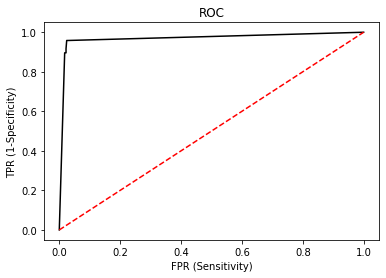

In [23]:
plt.plot(fpr, tpr, 'k')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('FPR (Sensitivity)')
plt.ylabel('TPR (1-Specificity)')
plt.title('ROC')
plt.show()

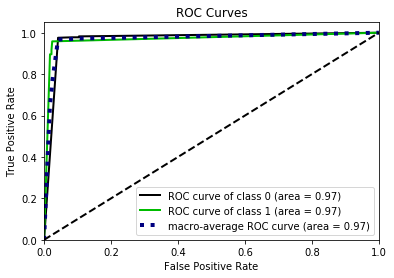

In [24]:
skplt.metrics.plot_roc(y_test, tree.predict_proba(X_test), plot_micro=False)
plt.show()

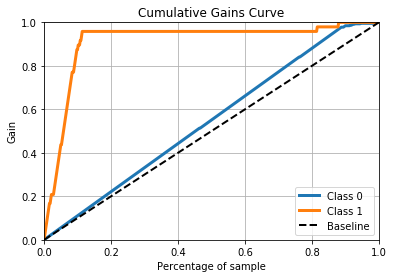

In [25]:
skplt.metrics.plot_cumulative_gain(y_test, tree.predict_proba(X_test))
plt.show()

#### 7. Lift Curve - % of samples can we send to reach 4x more respondants than benchmark model?

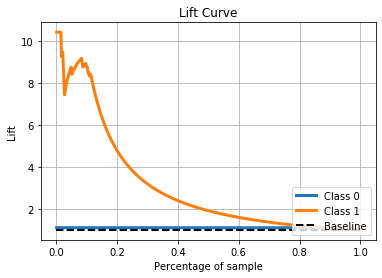

In [26]:
skplt.metrics.plot_lift_curve(y_test, tree.predict_proba(X_test))
plt.show()

To reach around 4x the number of respondants over the benchmark model, we should send to roughtly 0.23 (23%) of the list. 